## Bank Marketing Dataset


### Abstract

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

link: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

In [1]:
import math

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./data/bank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


- `age`: 나이
- `job`: 직업 유형(관리, 블루칼라 등)
- `marital`: 결혼 여부
- `education`교육 (중고등, 대학)
- `default`: 기본 신용 존재 여부
- `balance`: 은행 잔고
- `housing`: 자가
- `loan`: 개인 대출 여부
- `contact`: 연락처 통신 유형
- `day`: 날짜
- `month`: 월
- `duration`: 마지막 접촉 시간(초) 0이면 `deposit==False`
- `campaign`: 이 캠페인 동안 클라이언트에 대해 수행된 컨택 수
- `pdays`: 이전 캠페인에서 클라이언트가 마지막으로 컨택된 후 경과한 일 수 (-1는 클라이언트가 연결되지 않음)
- `previous`: 이 캠페인 이전에 이 고객에 대해 수행된 컨택 수
- `poutcome`: 이전 마케팅 캠페인의 결과
- `deposit`: 고객이 정기 예금 가입 여부

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
num_idx = df.dtypes[df.dtypes != 'object'].index
num_idx = [df.columns.get_loc(idx) for idx in num_idx]
df.iloc[:, num_idx].describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


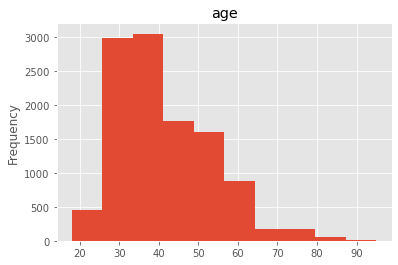

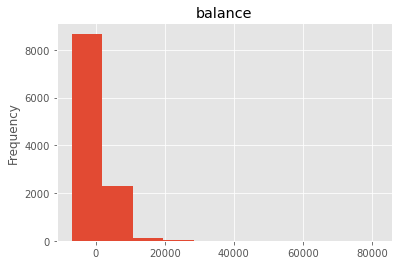

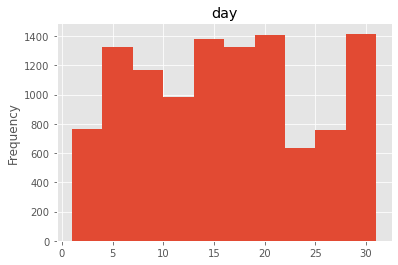

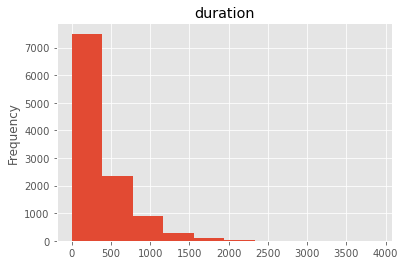

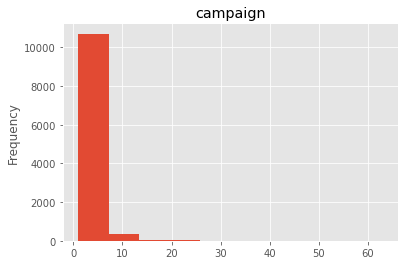

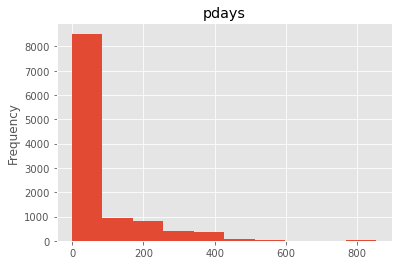

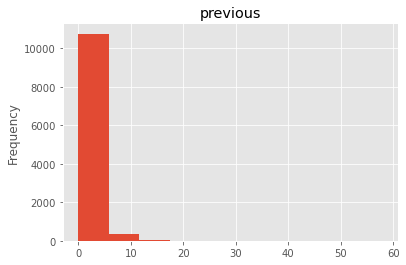

In [5]:
for col in num_idx:
    df.iloc[:, col].plot.hist(title=df.iloc[:, col].name);
    plt.show()

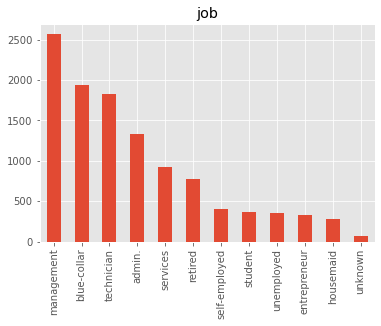

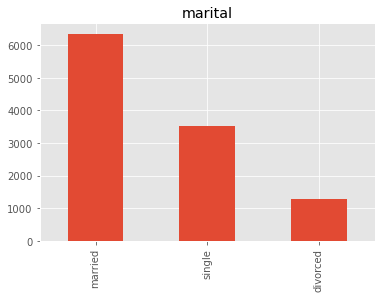

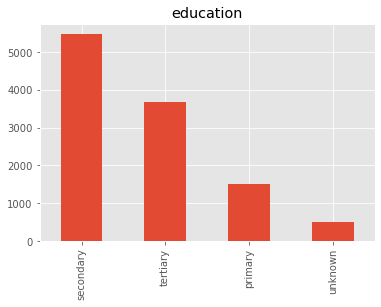

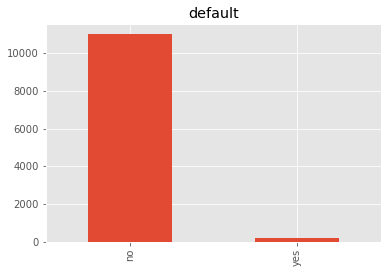

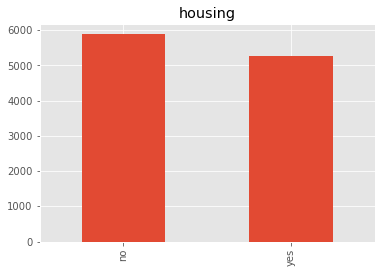

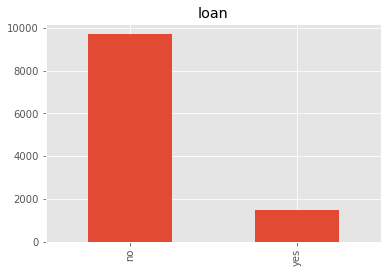

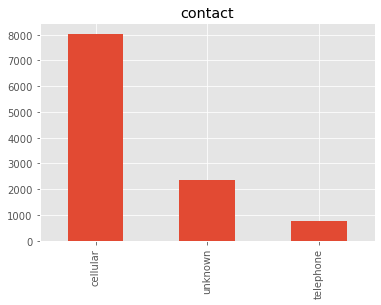

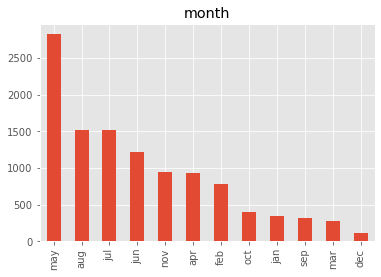

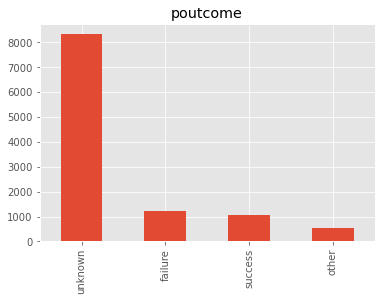

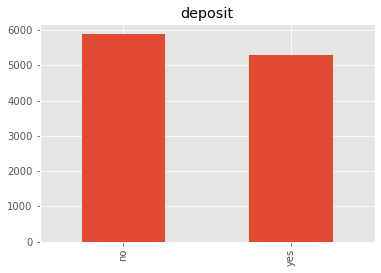

In [6]:
cat_idx = list(set(range(df.shape[1])) - set(num_idx))
for col in cat_idx:
    df.iloc[:, col].value_counts().plot.bar(title=df.iloc[:, col].name)
    plt.show()

### Analysis

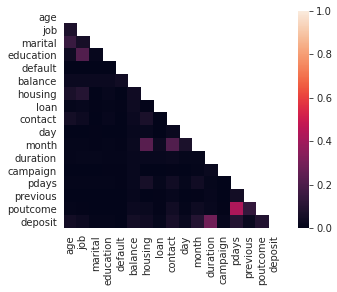

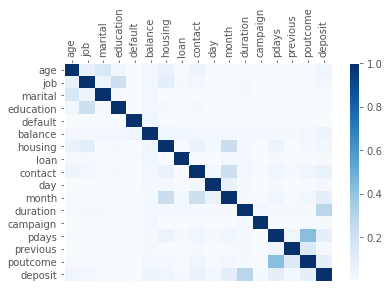

In [9]:
def discretize(x):
    if x < 2:
        return str(1)
    return str(int(math.log(x, 2) ** 2))

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

df_disc = df.copy()

disc_values = {}
for col in num_idx:
    results = []
    for value in df_disc.iloc[:, col]:
        results.append(discretize(value))
    disc_values[col] = results

disc_values = pd.DataFrame(disc_values).values

df_disc.iloc[:, num_idx] = disc_values

n_col = df_disc.shape[1]

cramer_v_matrix = [[] for _ in range(n_col)]

for i in range(n_col):
    for j in range(n_col):
        cramer_v_matrix[i].append(cramers_V(df_disc.iloc[:, i], df_disc.iloc[:, j]))

cramer_v_matrix = pd.DataFrame(cramer_v_matrix, index=df_disc.columns, columns=df_disc.columns)

mask = np.zeros_like(cramer_v_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(cramer_v_matrix, mask=mask, vmin=0., vmax=1., square=True)

plt.show()

fig, ax = plt.subplots()
heatmap = ax.pcolor(cramer_v_matrix, cmap=plt.cm.Blues)
cb = ax.figure.colorbar(heatmap, ax=ax)

ax.set_xticks(np.arange(cramer_v_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cramer_v_matrix.shape[0]) + 0.5, minor=False)

ax.set_xlim(0, int(cramer_v_matrix.shape[1]))
ax.set_ylim(0, int(cramer_v_matrix.shape[0]))

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(cramer_v_matrix.columns)
ax.set_yticklabels(cramer_v_matrix.columns)

plt.xticks(rotation=90)
plt.show()

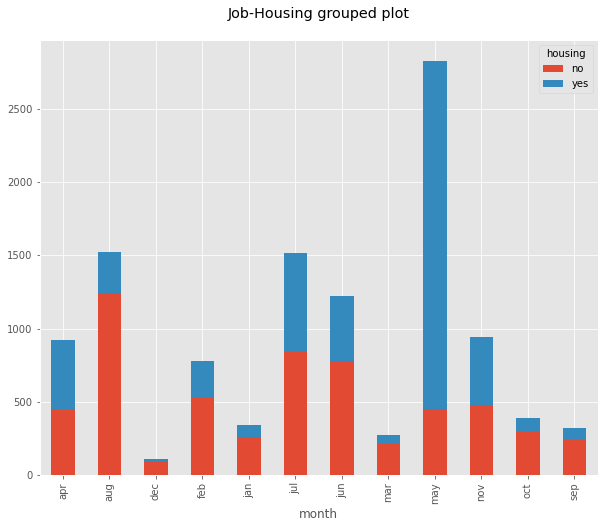

In [10]:
grouped_count = df_disc.groupby(['month', 'housing']).size()
grouped_count_unstack = grouped_count.unstack()
grouped_count_unstack.plot(kind='bar', stacked=True, figsize=(10, 8), title='Job-Housing grouped plot\n');

In [20]:
df_disc.loc[df_disc.marital == 'single'].deposit.value_counts()

yes    1912
no     1606
Name: deposit, dtype: int64

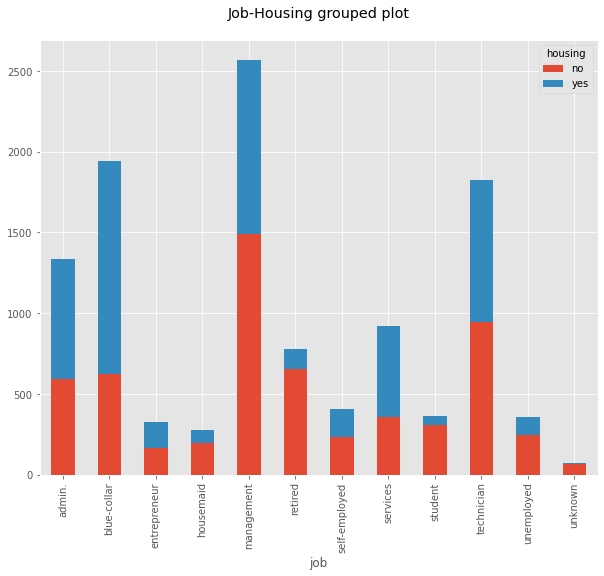

In [21]:
grouped_count = df_disc.groupby(['job', 'housing']).size()
grouped_count_unstack = grouped_count.unstack()
grouped_count_unstack.plot(kind='bar', stacked=True, figsize=(10, 8), title='Job-Housing grouped plot\n');

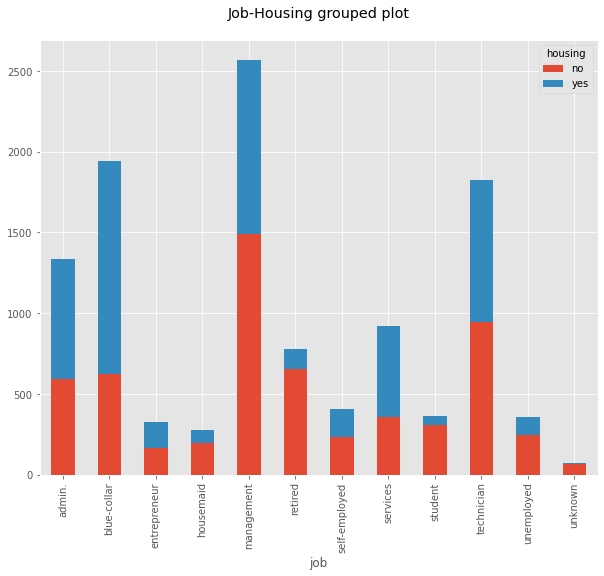

In [22]:
grouped_count = df_disc.groupby(['job', 'housing']).size()
grouped_count_unstack = grouped_count.unstack()
grouped_count_unstack.plot(kind='bar', stacked=True, figsize=(10, 8), title='Job-Housing grouped plot\n');

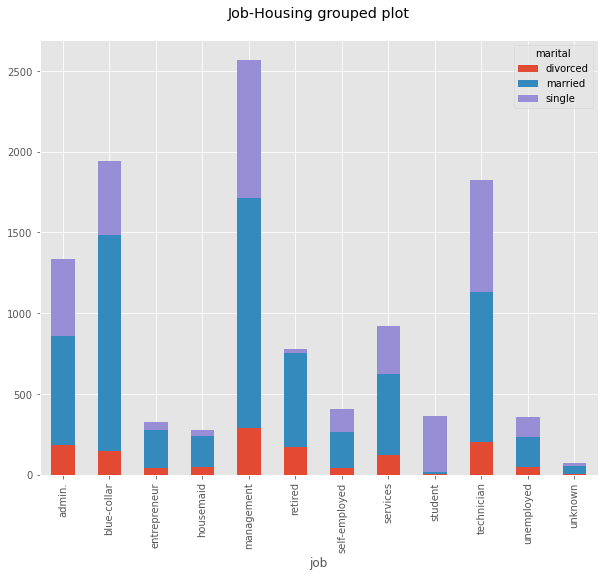

In [23]:
grouped_count = df_disc.groupby(['job', 'marital']).size()
grouped_count_unstack = grouped_count.unstack()
grouped_count_unstack.plot(kind='bar', stacked=True, figsize=(10, 8), title='Job-Housing grouped plot\n');

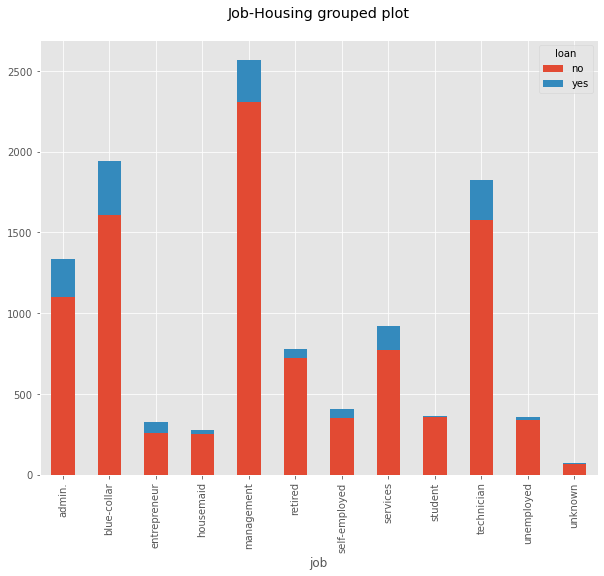

In [24]:
grouped_count = df_disc.groupby(['job', 'loan']).size()
grouped_count_unstack = grouped_count.unstack()
grouped_count_unstack.plot(kind='bar', stacked=True, figsize=(10, 8), title='Job-Housing grouped plot\n');

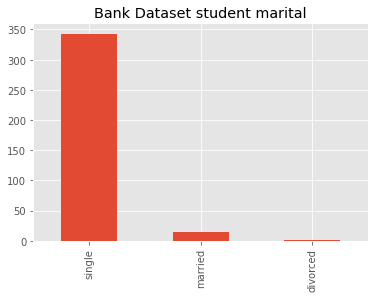

In [25]:
df_disc.loc[df_disc.job == 'student'].marital.value_counts().plot.bar(title='Bank Dataset student marital');

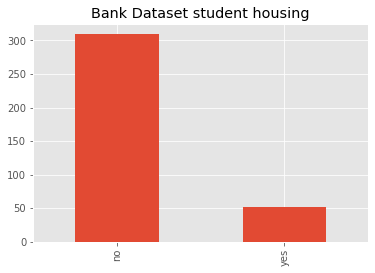

In [26]:
df_disc.loc[df_disc.job == 'student'].housing.value_counts().plot.bar(title='Bank Dataset student housing');

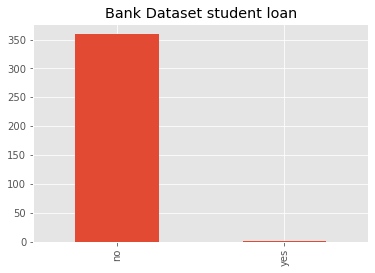

In [27]:
df_disc.loc[df_disc.job == 'student'].loan.value_counts().plot.bar(title='Bank Dataset student loan');

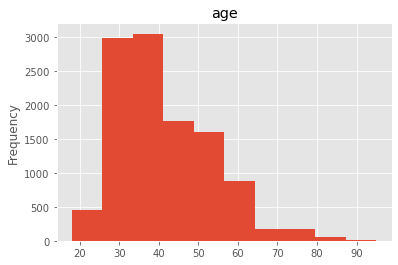

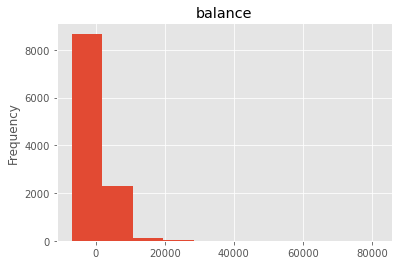

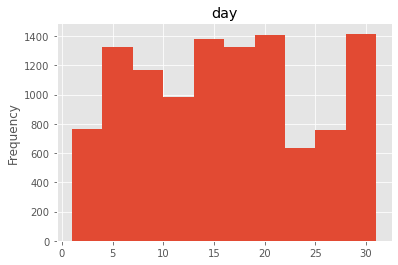

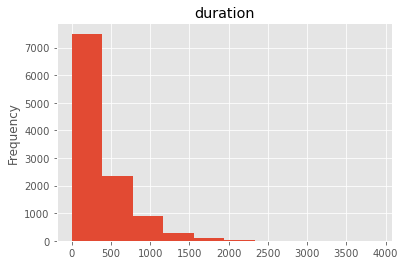

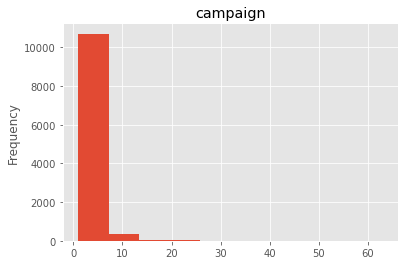

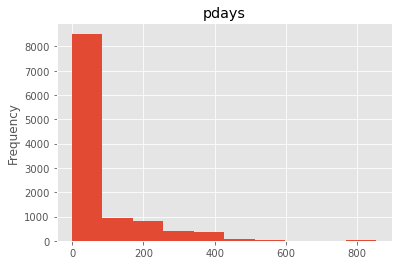

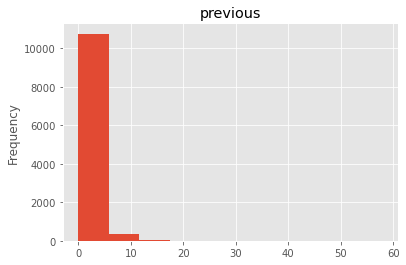

In [28]:
for col in num_idx:
    df.iloc[:, col].plot.hist(title=df.iloc[:, col].name);
    plt.show()

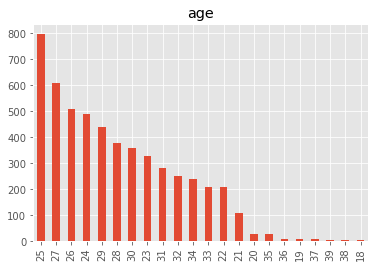

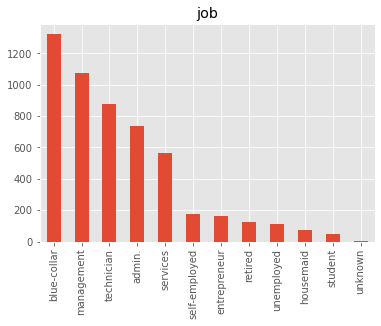

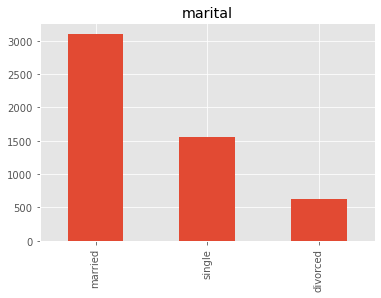

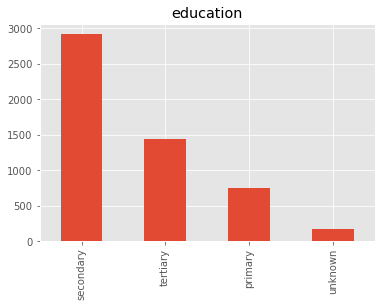

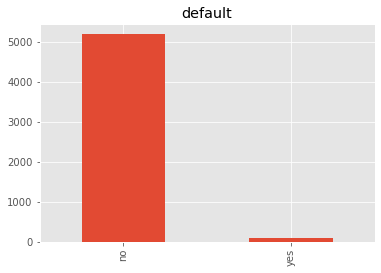

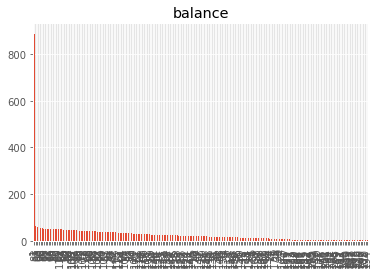

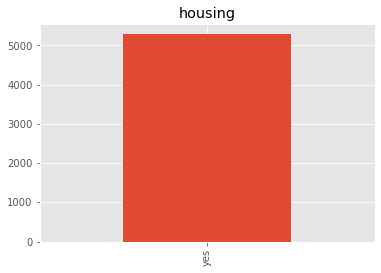

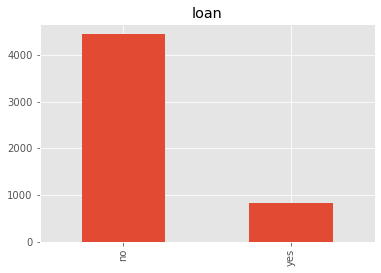

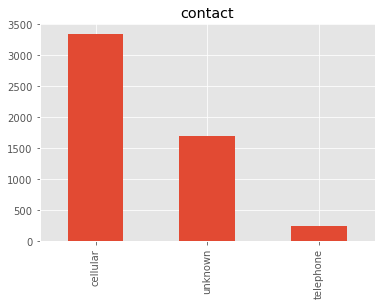

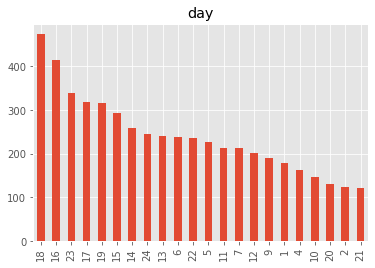

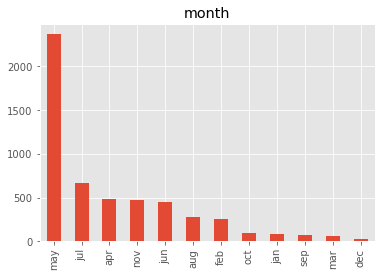

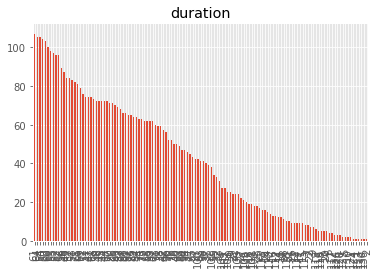

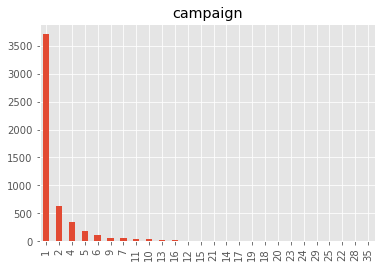

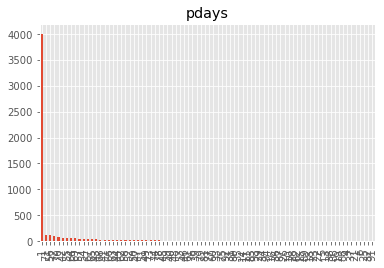

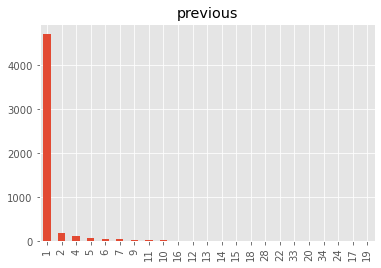

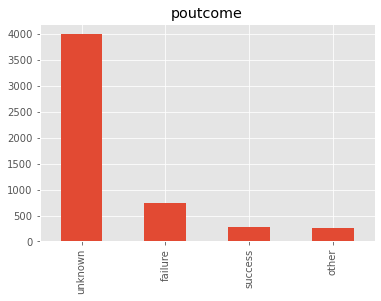

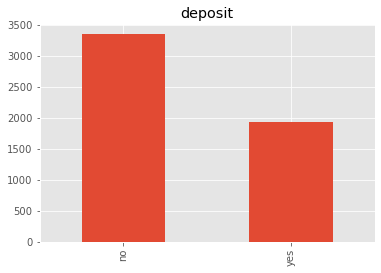

In [29]:
df_hp = df_disc.loc[df.housing != 'no']
for col in df_hp.columns:
    df_hp.loc[:, col].value_counts().plot.bar(title=col)
    plt.show()

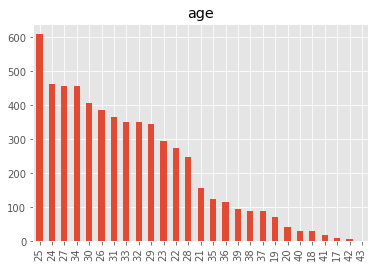

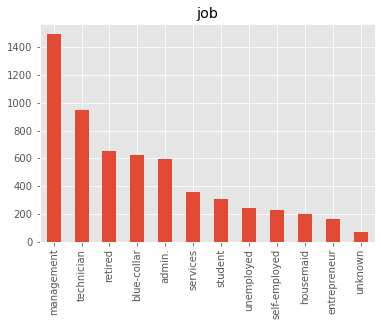

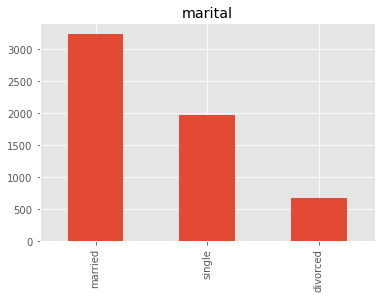

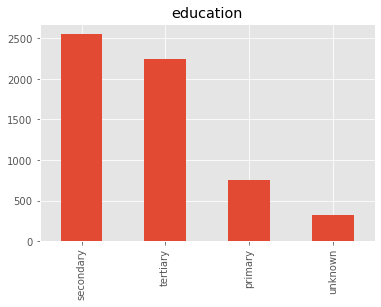

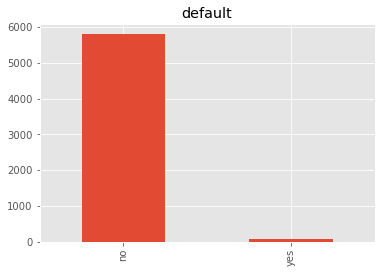

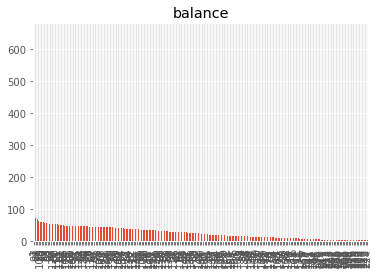

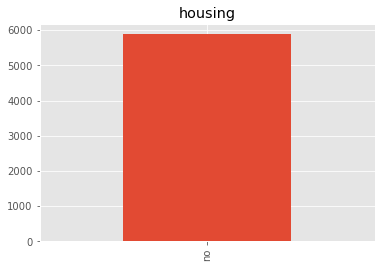

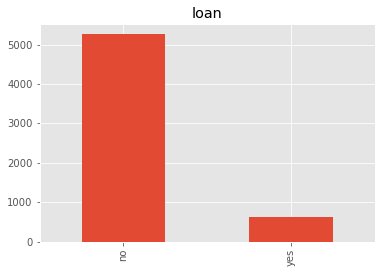

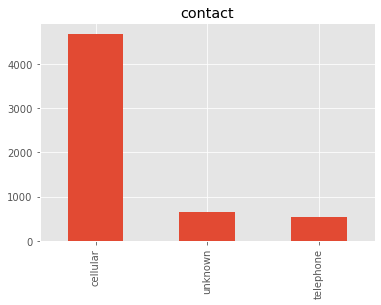

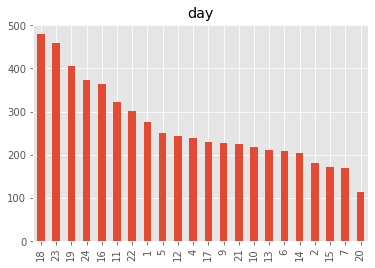

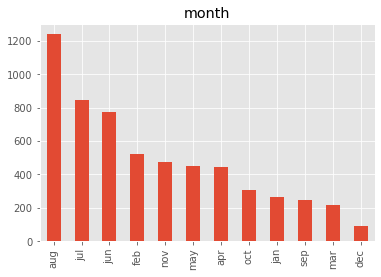

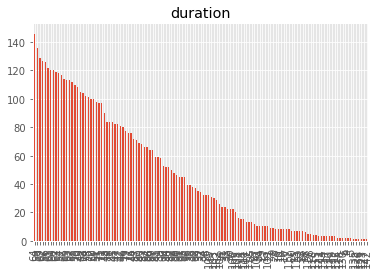

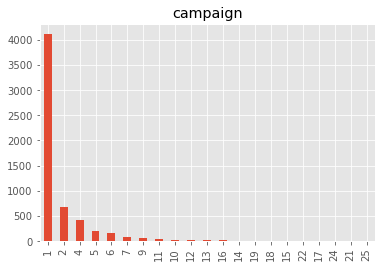

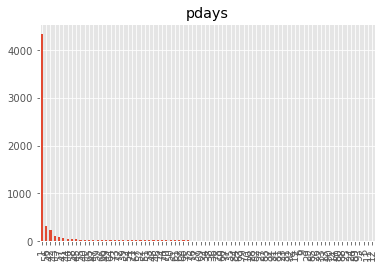

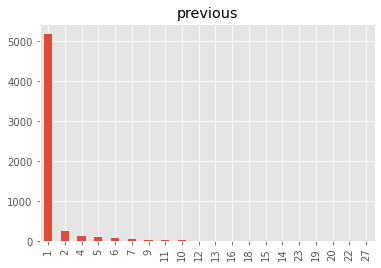

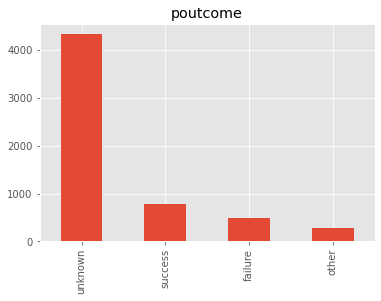

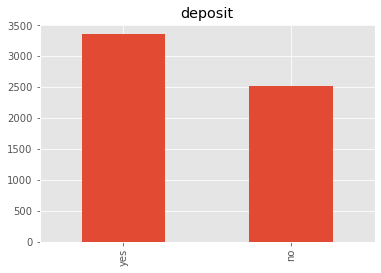

In [30]:
df_hp = df_disc.loc[df.housing == 'no']
for col in df_hp.columns:
    df_hp.loc[:, col].value_counts().plot.bar(title=col)
    plt.show()

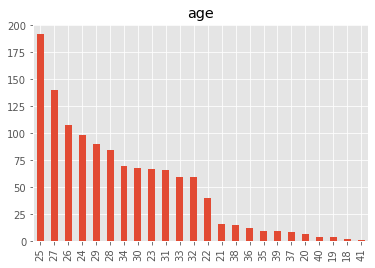

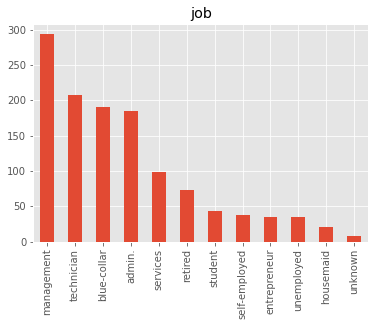

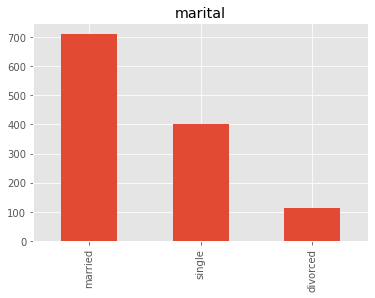

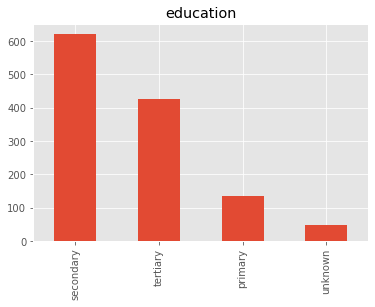

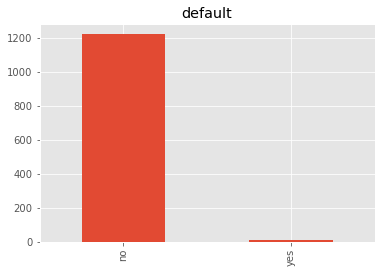

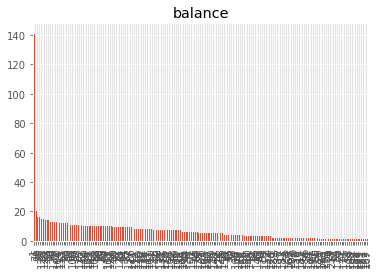

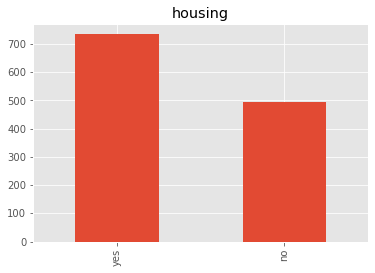

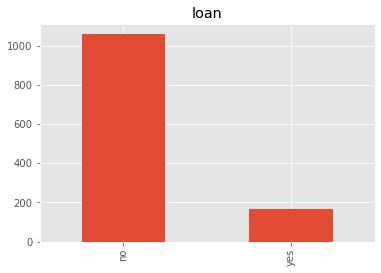

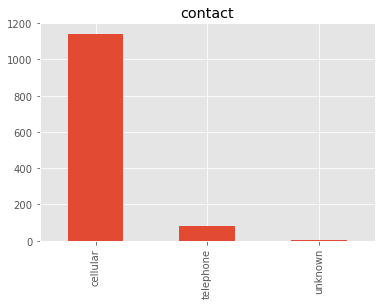

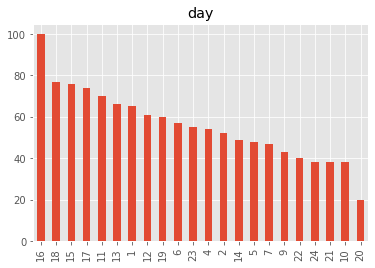

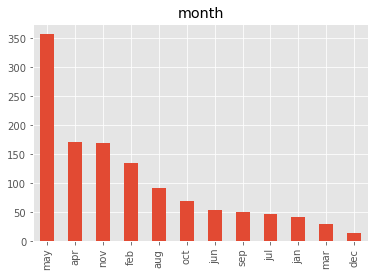

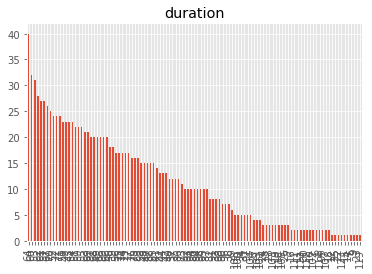

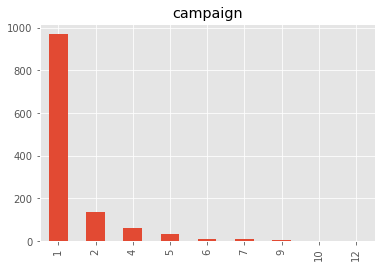

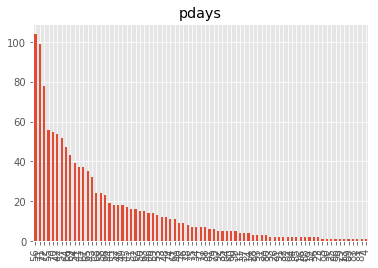

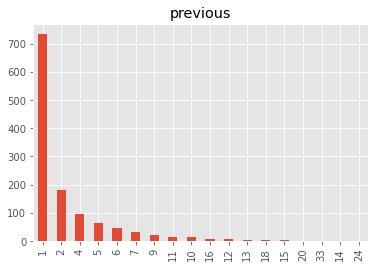

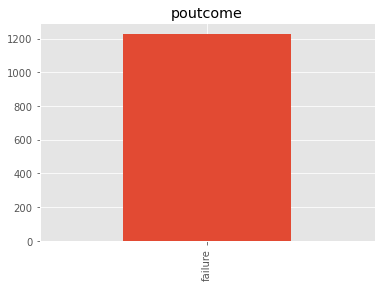

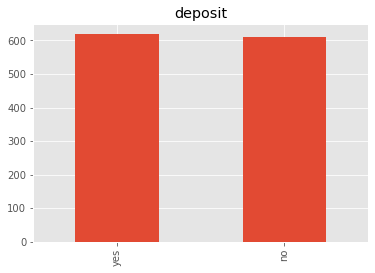

In [31]:
df_f = df_disc.loc[df.poutcome == 'failure']
for col in df_f.columns:
    df_f.loc[:, col].value_counts().plot.bar(title=col)
    plt.show()